In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji

In [42]:
df = pd.read_csv("data/twitter_dataset.csv")
df.head()

,symbol,id,text,date
0,MMM,1522712965799026688,Who remembers this? 🤣\n#mmm #scammers #Cryptoc...,2022-05-06
1,MMM,1522705394833174528,Donde? 🤔🤔\n°\n°\n#meme #memes #memesdaily #fol...,2022-05-06
2,MMM,1522632173274210304,HUGE!!! #MMM https://t.co/Ikl42uDWXv,2022-05-06
3,MMM,1522626413848899585,They have cinemas in Miami:\nhttps://t.co/qDZF...,2022-05-06
4,MMM,1522621082120990726,The #MMM #2022 #roadmap 🛣 What do you guys thi...,2022-05-06


In [43]:
# Clean text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@[A-Za-z0-9]+", "", text) #Remove @mention
    text = re.sub(r"#", "", text)   #Remove the '#' symbol
    text = re.sub(r"RT[\s]+", "", text)   # Remove retweet
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)   # Remove hyperlink
    text = re.sub(r"\n"," ", text)

    return text

In [44]:
df["text"][0]

'Who remembers this? 🤣\n#mmm #scammers #Cryptocrash https://t.co/G48toWXWCE'

In [45]:
clean_text(df["text"][0])

'who remembers this? 🤣 mmm scammers cryptocrash '

In [46]:
df["text_clean"] = df["text"].apply(clean_text)
df.head()

,symbol,id,text,date,text_clean
0,MMM,1522712965799026688,Who remembers this? 🤣\n#mmm #scammers #Cryptoc...,2022-05-06,who remembers this? 🤣 mmm scammers cryptocrash
1,MMM,1522705394833174528,Donde? 🤔🤔\n°\n°\n#meme #memes #memesdaily #fol...,2022-05-06,donde? 🤔🤔 ° ° meme memes memesdaily follow hum...
2,MMM,1522632173274210304,HUGE!!! #MMM https://t.co/Ikl42uDWXv,2022-05-06,huge!!! mmm
3,MMM,1522626413848899585,They have cinemas in Miami:\nhttps://t.co/qDZF...,2022-05-06,they have cinemas in miami: mmm ctvmorningliv...
4,MMM,1522621082120990726,The #MMM #2022 #roadmap 🛣 What do you guys thi...,2022-05-06,the mmm 2022 roadmap 🛣 what do you guys think?...


In [19]:
from wordcloud import WordCloud 
from textblob import TextBlob

In [47]:
# Subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] = df["text_clean"].apply(get_subjectivity)
df["Polarity"] = df["text_clean"].apply(get_polarity)

df

,symbol,id,text,date,text_clean,Subjectivity,Polarity
0,MMM,1522712965799026688,Who remembers this? 🤣\n#mmm #scammers #Cryptoc...,2022-05-06,who remembers this? 🤣 mmm scammers cryptocrash,0.000000,0.000000
1,MMM,1522705394833174528,Donde? 🤔🤔\n°\n°\n#meme #memes #memesdaily #fol...,2022-05-06,donde? 🤔🤔 ° ° meme memes memesdaily follow hum...,0.900000,0.600000
2,MMM,1522632173274210304,HUGE!!! #MMM https://t.co/Ikl42uDWXv,2022-05-06,huge!!! mmm,0.900000,0.781250
3,MMM,1522626413848899585,They have cinemas in Miami:\nhttps://t.co/qDZF...,2022-05-06,they have cinemas in miami: mmm ctvmorningliv...,0.000000,0.000000
4,MMM,1522621082120990726,The #MMM #2022 #roadmap 🛣 What do you guys thi...,2022-05-06,the mmm 2022 roadmap 🛣 what do you guys think?...,0.500000,0.500000
...,...,...,...,...,...,...,...
11442,ZION,1522500743810494465,22.435.2 Zion Holy Spirit Mission \nOrder appo...,2022-05-06,22.435.2 zion holy spirit mission order appoi...,0.000000,0.000000
11443,ZION,1522490429077393408,"If apartheid is coming out of #Zion, it should...",2022-05-06,"if apartheid is coming out of zion, it should ...",0.000000,0.000000
11444,ZION,1522449579861544960,☕ Good morning #Cryptonians! ☕\n\nEvery new da...,2022-05-06,☕ good morning cryptonians! ☕ every new day i...,0.384848,0.557955
11445,ZION,1522441495508393986,Zion in the afternoon #Nature #Outdoors #Grou...,2022-05-06,zion in the afternoon nature outdoors ground ...,0.000000,0.000000


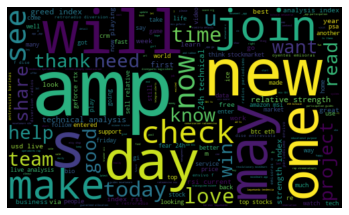

In [21]:
all_words = " ".join([twts for twts in df["text_clean"]])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
def get_analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Analysis"] = df["Polarity"].apply(get_analysis)

df

,symbol,id,text,date,text_clean,Subjectivity,Polarity,Analysis
0,MMM,1522712965799026688,Who remembers this? 🤣\n#mmm #scammers #Cryptoc...,2022-05-06,who remembers this? 🤣 mmm scammers cryptocrash,0.000000,0.000000,Neutral
1,MMM,1522705394833174528,Donde? 🤔🤔\n°\n°\n#meme #memes #memesdaily #fol...,2022-05-06,donde? 🤔🤔 ° ° meme memes memesdaily follow hum...,0.900000,0.600000,Positive
2,MMM,1522632173274210304,HUGE!!! #MMM https://t.co/Ikl42uDWXv,2022-05-06,huge!!! mmm,0.900000,0.781250,Positive
3,MMM,1522626413848899585,They have cinemas in Miami:\nhttps://t.co/qDZF...,2022-05-06,they have cinemas in miami: mmm ctvmorningliv...,0.000000,0.000000,Neutral
4,MMM,1522621082120990726,The #MMM #2022 #roadmap 🛣 What do you guys thi...,2022-05-06,the mmm 2022 roadmap 🛣 what do you guys think?...,0.500000,0.500000,Positive
...,...,...,...,...,...,...,...,...
11442,ZION,1522500743810494465,22.435.2 Zion Holy Spirit Mission \nOrder appo...,2022-05-06,22.435.2 zion holy spirit mission order appoi...,0.000000,0.000000,Neutral
11443,ZION,1522490429077393408,"If apartheid is coming out of #Zion, it should...",2022-05-06,"if apartheid is coming out of zion, it should ...",0.000000,0.000000,Neutral
11444,ZION,1522449579861544960,☕ Good morning #Cryptonians! ☕\n\nEvery new da...,2022-05-06,☕ good morning cryptonians! ☕ every new day i...,0.384848,0.557955,Positive
11445,ZION,1522441495508393986,Zion in the afternoon #Nature #Outdoors #Grou...,2022-05-06,zion in the afternoon nature outdoors ground ...,0.000000,0.000000,Neutral


In [49]:
len(df["symbol"].unique())

408

In [50]:
positives = df[["symbol", "Analysis"]][df["Analysis"]=="Positive"].groupby(by=["symbol"]).agg(['count']).reset_index()
positives.columns = positives.columns.get_level_values(0)
positives

,symbol,Analysis
0,A,40
1,AAL,5
2,AAP,36
3,AAPL,29
4,ABBV,5
...,...,...
342,WY,2
343,XOM,5
344,XRAY,18
345,YUM,69


In [27]:
total = df[["symbol", "Analysis"]].groupby(by=["symbol"]).agg(['count']).reset_index()

positives = df[["symbol", "Analysis"]][df["Analysis"]=="Positive"].groupby(by=["symbol"]).agg(['count']).reset_index()

total = pd.merge(total, positives, on="symbol", how="left").fillna(0)

total["score"] = total["Analysis_y"].div(total["Analysis_x"])

C:\Users\andre\AppData\Local\Temp\ipykernel_2452\463792062.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  total = pd.merge(total, positives, on="symbol", how="left").fillna(0)


In [28]:
total["weight"] = total["score"]/total["score"].sum()
total

,symbol,Analysis_x,Analysis_y,score,weight
,,count,count,,
0,A,99,40.0,0.404040,0.002103
1,AAL,60,5.0,0.083333,0.000434
2,AAP,100,36.0,0.360000,0.001873
3,AAPL,62,29.0,0.467742,0.002434
4,ABBV,7,5.0,0.714286,0.003717
...,...,...,...,...,...
403,XEL,1,0.0,0.000000,0.000000
404,XOM,9,5.0,0.555556,0.002891
405,XRAY,36,18.0,0.500000,0.002602


In [34]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"]
df = pd.merge(pd.DataFrame({'symbol':sp500}), total, on="symbol", how="left").fillna(0)
df

C:\Users\andre\AppData\Local\Temp\ipykernel_2452\2448900774.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(pd.DataFrame({'symbol':sp500}), total, on="symbol", how="left").fillna(0)
C:\Users\andre\AppData\Local\Temp\ipykernel_2452\2448900774.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.merge(pd.DataFrame({'symbol':sp500}), total, on="symbol", how="left").fillna(0)


,symbol,"(Analysis_x, count)","(Analysis_y, count)","(score, )","(weight, )"
0,MMM,21.0,11.0,0.523810,0.002726
1,AOS,36.0,16.0,0.444444,0.002313
2,ABT,6.0,4.0,0.666667,0.003469
3,ABBV,7.0,5.0,0.714286,0.003717
4,ABMD,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...
499,YUM,100.0,69.0,0.690000,0.003591
500,ZBRA,0.0,0.0,0.000000,0.000000
501,ZBH,0.0,0.0,0.000000,0.000000
502,ZION,22.0,7.0,0.318182,0.001656


In [ ]:
total["weight"].max()

In [ ]:
X.get_group('AAL')

In [ ]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"]

data = {'symbol':sp500,
        'weight':numpy.repeat(self.value/len(sp500)}
pd.DataFrame([sp500, np.zeros(len(sp500))])

In [ ]:
all_words = " ".join([twts for twts in df[df["Analysis"]=="Positive"]["text_clean"]])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1]:
from portfolio import Portfolio

In [2]:
portfolio = Portfolio("Baasic")

In [6]:
import pandas as pd
import numpy as np
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"]
portfolio.update_weights(np.repeat(1,len(sp500)))

In [81]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"]
pd.DataFrame({'symbol':sp500}).to_csv('data/stock_list.csv', index=False)

In [82]:
stock_list = pd.read_csv('data/stock_list.csv')

In [76]:
df_weights = pd.read_csv('data/weights.csv')
df_weights

,symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ABMD
...,...
499,YUM
500,ZBRA
501,ZBH
502,ZION


In [72]:
yesterday = "2022-05-06"
df_weights[yesterday] = 1
df_weights

,symbol,2022-05-06
0,MMM,1
1,AOS,1
2,ABT,1
3,ABBV,1
4,ABMD,1
...,...,...
499,YUM,1
500,ZBRA,1
501,ZBH,1
502,ZION,1


In [80]:
stock_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]["Symbol"]
stock_list

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
499     YUM
500    ZBRA
501     ZBH
502    ZION
503     ZTS
Name: Symbol, Length: 504, dtype: object

In [84]:
df_weights = pd.read_csv('data/weights.csv')
df_weights

,symbol,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07
0,MMM,0.002448,0.002586,0.002372,0.002965,0.002725,0.002338
1,AOS,0.002186,0.002020,0.001928,0.003089,0.002312,0.002027
2,ABT,0.001377,0.001421,0.000847,0.002746,0.003468,0.002838
3,ABBV,0.000000,0.000000,0.000000,0.002471,0.003716,0.003785
4,ABMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
499,YUM,0.003122,0.003133,0.003609,0.003509,0.003590,0.003009
500,ZBRA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,ZBH,0.000000,0.004973,0.000000,0.000000,0.000000,0.000000
502,ZION,0.003199,0.003529,0.003344,0.002372,0.001655,0.003209


In [116]:
import yfinance as yf
dt = yf.download(stock_list["symbol"].tolist(), "2022-05-03", "2022-05-07")

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [117]:
dt = dt['Close']

In [119]:
df_weights

,symbol,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07
0,MMM,0.002448,0.002586,0.002372,0.002965,0.002725,0.002338
1,AOS,0.002186,0.002020,0.001928,0.003089,0.002312,0.002027
2,ABT,0.001377,0.001421,0.000847,0.002746,0.003468,0.002838
3,ABBV,0.000000,0.000000,0.000000,0.002471,0.003716,0.003785
4,ABMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
499,YUM,0.003122,0.003133,0.003609,0.003509,0.003590,0.003009
500,ZBRA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,ZBH,0.000000,0.004973,0.000000,0.000000,0.000000,0.000000
502,ZION,0.003199,0.003529,0.003344,0.002372,0.001655,0.003209


In [157]:
dt2 = (1+dt.pct_change()).cumprod()
dt2

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03 00:00:00,1.023668,1.030711,0.997157,1.009623,1.011700,1.012016,1.000560,0.996455,1.000722,1.000712,...,0.999721,0.992569,1.020599,1.025977,1.006599,0.994039,1.000249,0.969887,1.008069,1.002691
2022-05-04 00:00:00,1.056285,1.057112,1.035613,1.051026,1.025157,1.052494,1.033250,1.025436,1.033683,1.039431,...,1.003486,1.010045,1.061220,1.058008,1.103507,1.023583,1.046995,0.969176,1.043326,1.012538
2022-05-05 00:00:00,1.021577,0.998922,1.004190,0.992466,1.029147,1.041753,0.952889,1.001595,0.980630,0.983353,...,0.955097,1.001651,1.045134,1.029256,1.054381,0.998791,1.015665,0.916168,1.007016,0.981565
2022-05-06 00:00:00,1.012629,0.961207,1.011821,0.995695,1.033543,1.067396,0.901404,0.995037,0.970913,0.960028,...,0.924557,1.005642,1.061104,1.023707,1.041305,0.996804,0.997348,0.902574,0.980705,0.968741


In [198]:
len(df_weights.columns)-2

5

In [193]:
value = 10000

for i in range(len(df_weights.columns)-2):
    
    new_valuation = 0
    print(value)
    print(new_valuation )
    for stock in stock_list:

        weight = df_weights[df_weights["symbol"]==stock].iloc[:,1:].to_numpy()[0][i]  # Weight on date i for stock
        movement = dt2["A"][i+1]   # Stock movement
        
        new_valuation += weight * value * movement
    
    value = new_valuation
    

10000
0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [201]:
df_weights[df_weights["symbol"]=="MMM"].iloc[:,1:].to_numpy()[0]

array([0.00244831, 0.00258579, 0.00237233, 0.00296545, 0.00272523,
       0.0023375 ])

In [177]:
df_weights[df_weights["symbol"]=="MMM"].iloc[:,1:]

,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07
0,0.002448,0.002586,0.002372,0.002965,0.002725,0.002338


In [186]:
start_value = 10000
df_weights[df_weights["symbol"]=="MMM"].iloc[:,1:].to_numpy()[0][0]

0.002448308662354

In [188]:
dt2["A"][1]

1.0236681595573942